# Cone distribution

In this notebook we create a cone distribution, which has the following density,

$$p(x) \propto \text{exp}(-|x|^\beta),$$

where $\beta > 0$ and $|x|$ is the Euclidean norm of the d-dimensional $x$. This distribution was created due to its long tails, for its use in testing MCMC algorithms.

Plotting a two-dimensional version of this function with $\beta=1$.

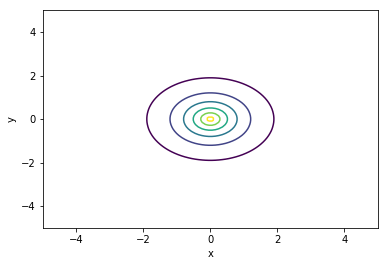

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf (default is 2-dimensional with beta=1)
log_pdf = pints.toy.ConeLogPDF()

# Contour plot of pdf
num_points = 100
x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Generate independent samples from this distribution and plot them

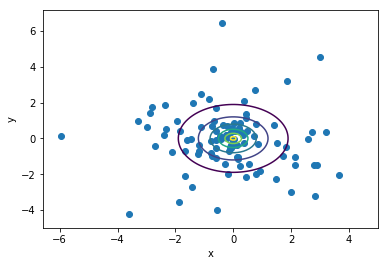

In [2]:
samples = log_pdf.sample(100)

num_points = 100
x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
d = map(lambda x: np.linalg.norm(x), samples)

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC seems to do ok at sampling from this distribution.

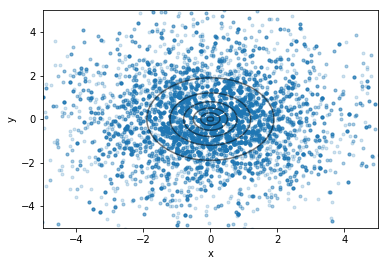

In [4]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4-dimensional cone

Now creating a 4 dimensional cone with $\beta=1$, then using Adaptive covariance MCMC to sample from it.

In [5]:
log_pdf = pints.toy.ConeLogPDF(dimensions=4)

# Create an adaptive covariance MCMC routine
x0 = np.zeros(log_pdf.n_parameters()) + np.random.normal(0, 1, size=(4, log_pdf.n_parameters()))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(8000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Compare the theoretical mean and variance of the normed distance from the origin with the sample-based estimates.

In [6]:
chain = np.vstack(chains)
d = map(lambda x: np.linalg.norm(x), chain)
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

True mean = 4.0
Sample mean = 3.8424013497
True var = 4.0
Sample var = 2.96095066254


## Longer tailed cone

Create a cone with $\beta=0.25$.

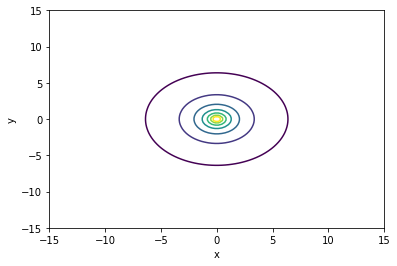

In [7]:
# Create log pdf
log_pdf = pints.toy.ConeLogPDF(dimensions=2, beta=0.5)

# Contour plot of pdf
num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Adaptive covariance MCMC finds it hard to efficiently sample from this distribution.

Running...
Done!


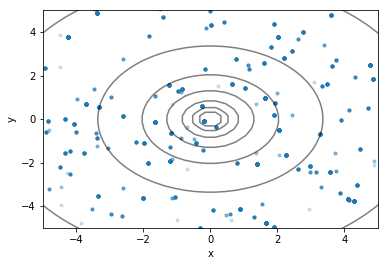

True mean = 20.0
Sample mean = 20.4925329385
True var = 440.0
Sample var = 353.368369511


In [8]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]
stacked = np.vstack(chains)

plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d = map(lambda x: np.linalg.norm(x), stacked)
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))